"PREDICTION AND ANALYSIS OF NATIONAL PARK TRAILS"

The thought process starting the project was to look through the data and arrive at some kind of question(s) I would answer through my project. It took about a day of EDA and data cleaning to uncover my dependent variable which is popularity of the National Park trail(s). My model would predict the popularity of a trail given a few parameters.

To uncover my features I thought I needed to engineer some columns. The new engineered features were basically introducing polynomials into the model. I knew with certain features length of trail, difficulty of trail, and elevation gain would increase popularity up to a certain point and start to drop or level off since it would be too much to handle for the majority of hikers! This shape would indicate a bisected sideways parabola.

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
data=pd.read_csv('AllTrails data - nationalpark.csv')

In [3]:
data.columns

Index(['trail_id', 'name', 'area_name', 'city_name', 'state_name',
       'country_name', '_geoloc', 'popularity', 'length', 'elevation_gain',
       'difficulty_rating', 'route_type', 'visitor_usage', 'avg_rating',
       'num_reviews', 'features', 'activities', 'units'],
      dtype='object')

In [4]:
data.isnull().sum()  #checking for Nan values

trail_id               0
name                   0
area_name              0
city_name              0
state_name             0
country_name           0
_geoloc                0
popularity             0
length                 0
elevation_gain         0
difficulty_rating      0
route_type             0
visitor_usage        253
avg_rating             0
num_reviews            0
features               0
activities             0
units                  0
dtype: int64

In [5]:
data.dropna(axis =1) #data cleaning

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,10008302,Silversword Loop Via Halemau'u Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.75275, 'lng': -156.22884}",9.3861,20116.750,1105.8144,5,loop,4.5,43,"['dogs-no', 'views', 'wild-flowers']","['birding', 'hiking', 'nature-trips']",m
3309,10236001,Keonehe'ehe'e Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.714480000000002, 'lng': -156.25072}",9.1555,28324.384,1171.9560,5,out and back,5.0,22,"['dogs-no', 'views', 'wildlife']","['backpacking', 'camping', 'hiking']",m
3310,10258707,Red Hill Overlook Summit Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.71007, 'lng': -156.25357}",8.5066,321.868,3.9624,1,out and back,4.5,31,"['dogs-no', 'kids', 'views']","['hiking', 'walking']",m
3311,10014989,Kaupo Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.64981, 'lng': -156.137}",8.3240,19312.080,1670.9136,5,out and back,4.0,8,"['dogs-no', 'views', 'wildlife']",['hiking'],m


Does the route type affect its popularity? Our data suggests that out and back is the most popular route type and the least is point to point.

In [6]:
#grouped by route type and saw their popularity 
data.groupby('route_type').apply(lambda x:x.sort_values(by='popularity', ascending=False).mean())

,trail_id,popularity,length,elevation_gain,difficulty_rating,visitor_usage,avg_rating,num_reviews
route_type,,,,,,,,
loop,1.019903e+07,8.932134,16181.491748,576.622995,2.979761,1.950495,4.177553,68.244710
out and back,1.017097e+07,9.490831,13683.780644,550.218052,3.141658,1.851746,4.161333,79.950682
point to point,1.022153e+07,5.824990,46540.101125,1408.744643,3.962500,1.778878,4.228125,20.234375


What are the characteristics of a poor trail? It seems the answer is number of reviews which indicates the trail needs to be popular which indicates its ease of access or which famous National Park its in. This is proven by the high correlation (.86) between popularity and num_reviews.

In [7]:
data.sort_values(by='popularity', ascending=False)[0:50].sort_values(by='area_name')

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
1264,10006208,The Beehive Loop Trail,Acadia National Park,Bar Harbor,Maine,United States,"{'lat': 44.33153, 'lng': -68.1852}",43.9161,2253.076,148.7424,5,loop,3.0,5.0,1123,"['beach', 'dogs-no', 'forest', 'lake', 'views'...","['birding', 'hiking', 'nature-trips', 'rock-cl...",i
2158,10001445,Double Arch Trail,Arches National Park,Moab,Utah,United States,"{'lat': 38.68831, 'lng': -109.53835}",36.8536,804.670,9.7536,1,out and back,4.0,4.5,546,"['dogs-no', 'kids', 'views', 'wild-flowers']","['hiking', 'nature-trips', 'walking']",i
2155,10031103,Devils Garden Loop Trail with 7 Arches,Arches National Park,Thompson,Utah,United States,"{'lat': 38.78271, 'lng': -109.59429}",44.0494,12070.050,325.8312,5,loop,3.0,5.0,1067,"['cave', 'dogs-no', 'partially-paved', 'views'...","['birding', 'hiking', 'nature-trips', 'snowsho...",i
2151,10012464,Delicate Arch Trail,Arches National Park,Moab,Utah,United States,"{'lat': 38.73568, 'lng': -109.5205}",63.6748,4988.954,186.8424,3,out and back,3.0,5.0,2332,"['dogs-no', 'kids', 'partially-paved', 'views'...","['birding', 'hiking', 'nature-trips', 'rock-cl...",i
2156,10018951,Fairyland Loop Trail,Bryce Canyon National Park,Bryce,Utah,United States,"{'lat': 37.64927, 'lng': -112.14717}",38.4225,11909.116,469.6968,3,loop,3.0,5.0,830,"['dogs-no', 'forest', 'partially-paved', 'view...","['birding', 'hiking', 'nature-trips', 'walking']",i
2153,10259625,Navajo Loop and Queen's Garden Trail,Bryce Canyon National Park,Bryce,Utah,United States,"{'lat': 37.62328, 'lng': -112.16706}",52.0201,4184.284,189.8904,3,loop,4.0,5.0,1097,"['dogs-no', 'forest', 'kids', 'views', 'wildli...","['birding', 'hiking', 'nature-trips', 'walking']",i
1458,10241534,Iceberg Lake Trail,Glacier National Park,Babb,Montana,United States,"{'lat': 48.79961, 'lng': -113.67921}",41.1262,14966.862,441.9600,3,out and back,2.0,5.0,806,"['beach', 'dogs-no', 'forest', 'lake', 'river'...","['birding', 'hiking', 'nature-trips', 'walking']",i
1456,10005697,Grinnell Glacier Trail,Glacier National Park,Babb,Montana,United States,"{'lat': 48.79724, 'lng': -113.66887}",49.8766,18185.542,658.9776,5,out and back,3.0,5.0,1198,"['dogs-no', 'forest', 'lake', 'river', 'views'...","['birding', 'fishing', 'hiking', 'nature-trips...",i
1457,10012848,Avalanche Lake via the Trail of the Cedars,Glacier National Park,Lake Mc Donald,Montana,United States,"{'lat': 48.68007, 'lng': -113.81912}",49.4404,9173.238,227.9904,3,out and back,3.0,4.5,1465,"['ada', 'dogs-no', 'forest', 'lake', 'kids', '...","['birding', 'hiking', 'nature-trips', 'skiing'...",i
1459,10000669,Hidden Lake Trail,Glacier National Park,Siyeh Bend,Montana,United States,"{'lat': 48.69563, 'lng': -113.71716}",37.2892,8529.502,418.7952,3,out and back,3.0,4.5,647,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'snowsho...",i


In [8]:
#My three engineered variables
data['elevation_gain_squared']=data['elevation_gain']**2

In [9]:
data['length_squared']=data['length']**2

In [10]:
data['difficulty_rating_squared']=data['difficulty_rating']**2

At this point my focus turned to running statistical tests (ANOVA) to answer the following questions:

1. Do the length of the trails vary signifigantly from the most popular parks, the moderately popular parks, and the less popular parks?
2. Is there a signifigant difference in the elevation gain in these trails from the most popular, moderately popular, and less popular parks?
3. Do more popular parks have higher difficulty trails, vice versa, or moderately spread out throughout the national park system?

But first I shall show my scrap work to set up the dataframe to answer these questions.

In [11]:
#creating a set of ordered lists to find the means of these variables
a=list(data['area_name']) 
b=list(data['popularity'])
ordered_list= list(zip(a,b))
c=list(data['length'])
d=list(data['difficulty_rating'])
ordered_list1=list(zip(c,d))
e=list(data['elevation_gain'])
f=list(data['num_reviews'])
ordered_list2=list(zip(e,f))

In [12]:
#Now I'm creating dataframes from those ordered lists to concat into a major dataframe
new_df=pd.DataFrame(ordered_list, columns=['area_name', 'popularity'])
new_df1=pd.DataFrame(ordered_list1, columns=['length','difficulty_rating'])
new_df2=pd.DataFrame(ordered_list2, columns=['elevation_gain','num_reviews'])
frames=[new_df, new_df1, new_df2]

In [13]:
#joining the dataframes
data_new=pd.concat(frames, axis=1, join='outer')

In [14]:
#Setup Acadia dataframe that groups by Park name.
Acadia=data_new.groupby('area_name').apply(lambda x:x.sort_values(by='popularity'))
Acadia.set_index('area_name').describe()

,popularity,length,difficulty_rating,elevation_gain,num_reviews
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000
mean,8.953441,17676.848717,3.167824,641.805943,70.341986
std,8.138323,25497.376640,1.702752,901.506642,184.118370
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.794100,4506.152000,1.000000,116.738400,5.000000
50%,6.573100,10621.644000,3.000000,359.968800,17.000000
75%,11.255600,21404.222000,5.000000,833.932800,57.000000
max,84.622900,529794.728000,7.000000,14029.944000,3903.000000


In [15]:
#Creating another list that has all the means of the popularity for EACH PARK.
popularity_list=[]
for ele in list(Acadia['area_name'].unique()):
    popularity_list.append(Acadia.loc[ele]['popularity'].mean())

In [16]:
#the same for length of trails as grouped by PARK.
length_list=[]
for ele in list(Acadia['area_name'].unique()):
    length_list.append(Acadia.loc[ele]['length'].mean())

In [17]:
#the same for elevation gain
elevation_gain_list=[]
for ele in list(Acadia['area_name'].unique()):
    elevation_gain_list.append(Acadia.loc[ele]['elevation_gain'].mean())

In [18]:
#as well as difficulty rating. These means shall be used for our 3 ANOVA tests. 
difficulty_rating_list=[]
for ele in list(Acadia['area_name'].unique()):
    difficulty_rating_list.append(Acadia.loc[ele]['difficulty_rating'].mean())

In [19]:
#Now that I have calculated all the means, I will need to create another dataframe from these 
#ordered lists of means 
area_name_list=list(Acadia['area_name'].unique())

In [20]:
#turning the lists into dataframes
dfa=pd.Series(area_name_list)
dfb=pd.Series(popularity_list)
dfc=pd.Series(length_list)
dfd=pd.Series(elevation_gain_list)
dfe=pd.Series(difficulty_rating_list)
frames1=[dfa, dfb, dfc,dfd,dfe]

In [21]:
#concatenating the dataframes
data_new1=pd.concat(frames1, axis=1, join='outer')

In [22]:
#Giving the new dataframe names
data_new1.columns = ['area_name', 'popularity', 'length', 'elevation_gain', 'difficulty_rating'] 
  

In [23]:
#Sorting by popularity
ANOVA_tester=data_new1.sort_values(('popularity'),ascending=False)

There are 60 National Parks each with a number of trails. The means have been calculated and now the groups must be determined for the ANOVA testing. I divided these groups into the top 6, the middle 6 and the lowest 6. See below:

In [24]:
#I called this dataframe ANOVA_tester
ANOVA_tester['length'][0:5].round(2) #group1
ANOVA_tester['length'][27:33].round(2) #group2
ANOVA_tester['length'][53:59].round(2) #group3

19    16938.30
4      5351.06
13    12070.05
54     7058.11
35    31744.23
37     4747.55
Name: length, dtype: float64

In [25]:
import scipy.stats as stats
stats.f_oneway(ANOVA_tester['length'][0:6], ANOVA_tester['length'][27:33], 
               ANOVA_tester['length'][53:59])

F_onewayResult(statistic=0.23844288734586563, pvalue=0.7907835251372272)

This f-stat shows there is no signifigant difference in the length of trails between the parks.

In [26]:
#This is my second ANOVA test groups to answer the second question
ANOVA_tester['elevation_gain'][0:5].round(2) #group1
ANOVA_tester['elevation_gain'][27:33].round(2) #group2
ANOVA_tester['elevation_gain'][53:59].round(2) #group3

19      1.79
4       0.69
13      2.74
54    117.17
35    560.83
37    144.78
Name: elevation_gain, dtype: float64

In [27]:
stats.f_oneway(ANOVA_tester['elevation_gain'][0:6], ANOVA_tester['elevation_gain'][27:33], 
               ANOVA_tester['elevation_gain'][53:59])

F_onewayResult(statistic=2.745813409137359, pvalue=0.09635209382917982)

The f-stat above shows that there is no signifigant difference in the elevation gain of the trails between the parks

In [28]:
ANOVA_tester['difficulty_rating'][0:5].round(2) #group1
ANOVA_tester['difficulty_rating'][27:33].round(2) #group2
ANOVA_tester['difficulty_rating'][53:59].round(2) #group3

19    1.17
4     1.00
13    1.00
54    1.57
35    3.00
37    2.00
Name: difficulty_rating, dtype: float64

In [29]:
stats.f_oneway(ANOVA_tester['difficulty_rating'][0:6], ANOVA_tester['difficulty_rating'][27:33], 
               ANOVA_tester['difficulty_rating'][53:59])

F_onewayResult(statistic=5.569244947533063, pvalue=0.01552675651482935)

The f-stat above show that there is a signifigant difference between the difficulty ratings of each of the three groups of parks

Now I continue with my OLS model that can be run using my engineered features. The dependent variable is popularity. I chose to run the original feature AND the engineered features derived from them to reinforce my reasoning that there is a direct relationship between popularity.

In [30]:
from statsmodels.formula.api import ols

In [31]:
#my OLS model
trails_model = ols(formula='popularity~length+num_reviews+difficulty_rating+elevation_gain+difficulty_rating_squared+elevation_gain_squared+length_squared', data=data).fit()
trails_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     1367.
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        12:24:58   Log-Likelihood:                -9394.3
No. Observations:                3313   AIC:                         1.880e+04
Df Residuals:                    3305   BIC:                         1.885e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     7.2223      0.253     28.515      0.000       6.726       7.719
length                    -5.389e-05   7.53e-06     -7.160      0.000   -6.87e-05   -3.91e-05
num_reviews                   0.0375      0.000     94.944      0.000       0.037       0.038
difficulty_rating            -0.2382      0.158     -1.503      0.133      -0.549       0.073
elevation_gain                0.0005      0.000      2.000      0.046    9.62e-06       0.001
difficulty_rating_squared     0.0292      0.022      1.338      0.181      -0.014       0.072
elevation_gain_squared      5.12e-09   2.37e-08      0.216      0.829   -4.14e-08    5.17e-08
length_squared             1.137e-10   2.16e-11      5.278      0.000    7.15e-11    1.56e-10
==============================================================================
Omnibus:                     1612.589   Durbin-Watson:                   0.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108948.943
Skew:                          -1.475   Prob(JB):                         0.00
Kurtosis:                      30.938   Cond. No.                     2.67e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficients that I think were most impactful to my model are num reviews, difficulty squared, elevation gained squared and length squared. The num reviews has a correlation quotient of .86 on the heatmap meaning it is a strong predictor of popularity. The reason I picked the other three squared values were because I wanted a parabolic shape to the model. The parabolic shape is due to the 'leveling off' of those variables because there would be a point where difficulty, length and elevation gain would be too much to handle for most people.

Now I begin fitting my model and getting ready for the train/test/split of my data. I start first by setting up my features and target to be inputted in to the sklearn modules.

In [32]:
x=['length','num_reviews','difficulty_rating','elevation_gain','difficulty_rating_squared', 'elevation_gain_squared', 'length_squared']

target = data['popularity']
features = data[x]

In [33]:
from sklearn.feature_selection import RFECV
ols = linear_model.LinearRegression()
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')


The actual train_test_split line is below

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.2)


In [35]:
# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [36]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [52]:
list(selected_rfe)

['length',
 'num_reviews',
 'difficulty_rating',
 'elevation_gain',
 'difficulty_rating_squared']

Setting up a visual printout of our training and testing data

In [38]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (2650, 7) Target:  (2650,)
Test set - Features:  (663, 7) Target:  (663,)


In [39]:
# fit a model
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


In [40]:
print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: 0.7618688819588866


In [41]:
y_train_pred = lm.predict(X_train)

Above is our code for running our training data through our model. And below is a visual printout of some metrics such as MAE, MSE, and RMSE to evaluate how well our model performed with the training data.



In [42]:
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
price_std = target.std()


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)
print('Mean Absolute Error in Z-Score:', train_mae/price_std )


Mean Absolute Error: 2.986465958409899
Mean Squared Error: 16.068427906541668
Root Mean Squared Error: 4.008544362551283
Mean Absolute Error in Z-Score: 0.36696333314954155


In [43]:
y_pred = lm.predict(X_test)

In [44]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.6539838155311732


In [45]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Mean Absolute Error  Z:', test_mae/price_std )


Mean Absolute Error:2.974753229250545
Mean Squared Error:21.113761035671626
Root Mean Squared Error:4.594971276914756
Mean Absolute Error  Z: 0.36552412634375464


In [46]:
print('Training: ', (train_rmse), "vs. Testing: ", (test_rmse))

Training:  4.008544362551283 vs. Testing:  4.594971276914756


FINAL MODEL EXPLANATION:

My final model contained five features, an R^2 value of .76, and a RAE, MSE and RMSE of 2.98, 21.06, and 4.59 respectively. There was one outlier where my prediction was off by a large margin which explains why my RMSE is higher then my RAE. The RMSE between the training and testing data shows that I overfitted meaning perhaps that my model is too complex, but the outlier may be the reason why there is overfit in my model. The overfitting maybe reduced by using less features.

I will now make 4 visualizations to accompany my model to be used in the presentation.



Text(0, 0.5, 'Predictions')

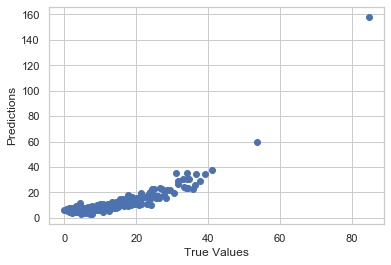

In [47]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

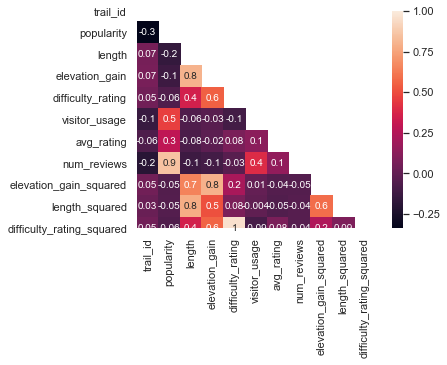

In [48]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(),annot = True, square=True, vmax=1, fmt='.1g', mask=matrix)
plt.show()

In [49]:
#The counts were used to create the pie chart
data['state_name'].value_counts()

California        707
Washington        320
Wyoming           311
Utah              292
Colorado          262
Virginia          191
Maine             179
Tennessee         175
Arizona           174
Montana           151
North Carolina    118
Texas              94
Ohio               50
Hawaii             35
Florida            31
Alaska             29
Kentucky           28
Nevada             25
North Dakota       23
Oregon             22
South Dakota       20
Indiana            16
Arkansas           16
Maui               14
New Mexico          8
South Carolina      8
Minnesota           7
Michigan            4
Missouri            2
Georgia             1
Name: state_name, dtype: int64

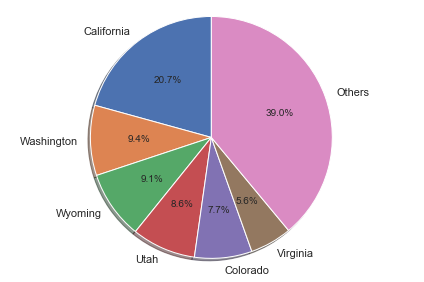

In [50]:
# Pie chart
labels = ['California', 'Washington', 'Wyoming', 'Utah', 'Colorado', 'Virginia', 'Others']
sizes = [707, 320, 311, 292, 262, 191,1330]
# only "explode" the 2nd slice (i.e. 'Hogs')
# explode = (0, 0, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

IndexError: index 4 is out of bounds for axis 1 with size 4

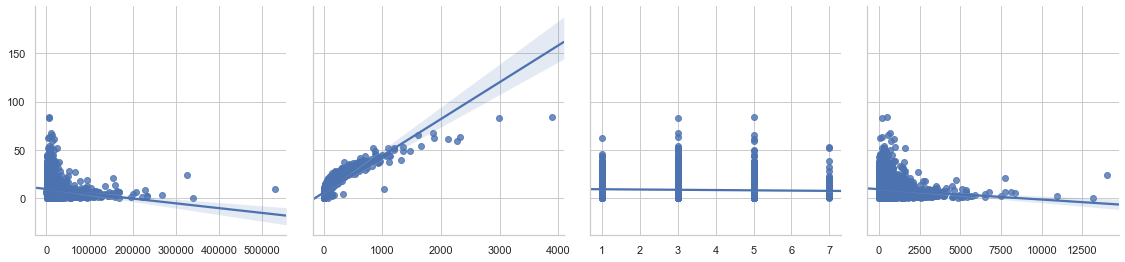

In [51]:
n = 4
#the visulualization of my features against my target variable
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    pp = sns.pairplot(data=data, y_vars=['popularity'],x_vars=i, kind="reg", height=4)